In [1]:
###### HI HELLO
import numpy as np # fast array library
import pandas as pd # data frames library
from pandas_ods_reader import read_ods #read ods tables

import matplotlib 
import matplotlib.pyplot as plt # plot library
import matplotlib.gridspec as gridspec
import matplotlib.ticker as tck
from mycolorpy import colorlist as mcp # color levels from a color map

import subprocess # these 2 lines below load OS functionality
import sys
import json
import warnings
 
from IPython.display import display, HTML # screen on display in HTML library 

import sympy as sp # symbolic calculation library functions
from sympy import var # symbolic calculation library variables

import mpmath as mp # double (or higher) floating point precision library (not used)

import scipy.constants as ct # import mathematical constants
import scipy.special as spec
from scipy.spatial import Voronoi, voronoi_plot_2d # import Voronoi functions
import scipy.optimize as optimize # optimazation library (not used)
from scipy import signal # noise filtering functions
from scipy import stats # statistics, for binning and fields calculation
from scipy.fft import fft, ifft, fftfreq

from scipy.spatial import Voronoi, voronoi_plot_2d # import Voronoi functions


import ipywidgets as widgets # import 

import time # timing functions (for computation time)
from pytictoc import TicToc

# print progress function
# more elegant (python 3 alternative): print('\rhello', end='',flush=True)
def printp(string):
    sys.stdout.write('\r'+ str(string))
    sys.stdout.flush()
    
    
#from __future__ import print_function

# Text format for figures configuration (lines below)
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': 20})
#rc('font',**{'family':'serif','serif':['Times']})
#rc('text', usetex=True)

In [2]:
%matplotlib ipympl

## _Read tracking data_ 


__get_data(Npart, T_Temp, fps_value, experiments_list) :__ Obtains data table with velocities and spin information, from a selected experiment. Experiment is selected by  number of particles (Npart), average translational kinetic energy (T_Temp), frames per second in the movie (fps_value). Finally, the absolute path to the opendocument spreadsheet containing the experiment list is given (this is necessary). The function proceeds by calling three other auxiliary functions.

We explain the action of each of these sub-functions below:

__get_info(series_directory, hash_prefix, silent) :__ Reads and prints info file by means of providing the  _hash prefix_ hash code (i.e., the file name of the data table that corresponds to the selected experiment). 

__simple_pickle_read(series_directory, hash_prefix) :__
This 'simple_pickle_read' takes a pkl.xz file _hash prefix_ hash code, and which contains xy positions and tracks (no velocities) and stores in 'tabla' pandas data frame.
   
  * input: hash_prefix
  * output: global variable _Ntracks_ (number of tracks) 
  
__get_ID(Npart, T_Temp, fps_value, experiments_list) :__ Reads spreadsheet to obtain experiment list from there obtains the hash ID (file name) of the selected experiment, according to number of particles (Npart), average translational kinetic energy (T_Temp) and frames per second in the movie (fps_value).

In [3]:
def pdisplay(frame):
    display(HTML(frame.to_html()))

# This function reads pickle binary file (.pkl) with trajectories
def get_info(series_directory, hash_prefix, silent):
    global info
    nombre = '/home/fvega/Datos/blades/packing_fraction_0' + series_directory + '/info/'  + hash_prefix + '.txt'
    with open(nombre) as f:
        jsonstr = json.load(f)
    info = pd.json_normalize(jsonstr)
    if silent==False:
        pdisplay(info.T)
    return info
    
def simple_pickle_read(series_directory, hash_prefix):
    global Nframes, Ntracks
    # Read table in pickle format
    nombre = '/home/fvega/Datos/blades/packing_fraction_0' + series_directory + '/ref_angle/' +  hash_prefix \
       + '.pkl.xz'
    tabla = pd.read_pickle(nombre, compression='infer')
    tabla = tabla.reset_index(drop=True) # order row indexes
    tabla.drop(columns=['r']) # distance from center not needed
    Nframes = np.max(tabla.frame) # no. of frames recorded
    Ntracks = np.max(tabla.track) + 1 # no. of particles detected
    tabla = tabla.sort_values(by = ['frame', 'track']).reset_index(drop=True)
    print('\ndata table first rows: \n')
    pdisplay(tabla.head())
    return tabla # returns selected data table

def get_ID( Npart, T_Temp, fps_value, experiments_list):
    global experiments, selected_series, T_Temp_list, closest_exp
    experiments = read_ods(str(experiments_list), sheet=0)
    experiments = experiments[['ID', 'N', 'fps','Tt', 'w']][:115]
    selected_series = experiments[experiments.N==Npart]
    selected_series = selected_series[selected_series.fps==fps_value]
    T_Temp_list = np.abs(selected_series.Tt.values - T_Temp)
    closest_exp = np.where(T_Temp_list == np.min(T_Temp_list))[0][0]
    selected_ID = selected_series.ID.values[closest_exp]
    print('experiment ID is: ', selected_ID)
    print('\nExact Tt is: ', selected_series.Tt.values[closest_exp])
    return selected_ID

def get_data(Npart, T_Temp, fps_value, experiments_list):
    ID = get_ID(N, Tt, fps, experiments_list)
    print('\n[run "pdispay(info.T)" to print complete information on the selected experiment]\n')
    if Npart<10:
        prefix = '0'
    else:
        prefix=''
    return get_info(prefix + str(N), ID, True), simple_pickle_read( prefix + str(N), ID + '_w')

In [4]:
N = 45 # pick experiments series with N particles
Tt = 2.5 # approximate value of Tt you want to read
fps = 900 # chosen experiment movie fps rate (possible values: here, needs to be 900 always)
experiments_list = '/home/fvega/Datos/blades/tabla_experimentos.ods' # path to the experiment list table

info, tabla = get_data(N, Tt, fps, experiments_list)


experiment ID is:  712d5be2fce52eade6c5564a1f80368f

Exact Tt is:  2.646642

[run "pdispay(info.T)" to print complete information on the selected experiment]


data table first rows: 



,frame,track,x,y,r,vx,vy,theta,w
0,1,0,40.447408,-328.000325,330.503922,0.524411,-0.130805,0.054788,-0.257425
1,1,1,250.116228,46.946393,254.483786,0.081716,0.258624,0.124128,-0.306061
2,1,2,148.381647,46.766712,155.597506,-0.524196,-0.366213,0.028424,-0.259548
3,1,3,-101.934270,61.259356,118.969281,0.188688,0.546385,0.843234,-0.256986
4,1,4,-22.228572,72.072925,75.432304,-0.097197,-0.233317,0.078081,-0.228640


In [5]:
pdisplay(info.T)

,0
experiment_id,712d5be2fce52eade6c5564a1f80368f
original_file,/mnt/beegfs/malopez/serieAspas/serieAspas_N45_p23_fps900_1.cine
date,2038-01-19 06:37:38
shape,"[1280, 800]"
fps,900
exposure,1109
n_frames,24981
recording_time,27.756667
camera_distance,0.95
pixel_ratio,1075.862069


In [6]:
experiments[experiments.N==45]

,ID,N,fps,Tt,w
61,5ac8543758342346a52402e578bfaf41,45.0,250.0,0.455877,-0.387854
62,9bd37c11859b49f916d355e03d62a6fc,45.0,900.0,0.455877,-0.387854
63,155e9e3bf635544e8ff7240c760bee7b,45.0,250.0,0.627246,-0.245044
64,0aa7ece214139db8501bb5b4ac3fbdc1,45.0,250.0,0.706609,-0.150861
65,48d0a742c060c9b28e30e8b2490c80bc,45.0,250.0,0.803102,-0.107098
66,9cd14eb3963525cea5f0ea8e5ad33614,45.0,250.0,1.087504,0.012065
67,f509f3b902a7ada8064a9247404d7019,45.0,250.0,1.160905,0.055883
68,d55cb1546d02979fa61786c347dd440d,45.0,250.0,1.499319,0.145326
69,fa20f7895bd20257d9a2531abe98bf8e,45.0,250.0,1.692696,0.162205
70,656ac3f84a53672294b835362a2c563f,45.0,250.0,1.775451,0.221584


In [7]:
# Calculate time correlation by using matrices
def time_shift_mat_av(array, it):
    nt = len(array)
    return np.sum( np.diag(array , k=it)[:nt,:nt].dot(array) )/(nt-i-1)

# Calculate time correlation by using arrays (faster)
# 'array' is the array over which autocorrelation is computed. 'demom' is a normalization factor. 
# 'it' is the no. of time values on which autocorrelation is computerd
def time_shift_np_av(array, denom,it):
    return np.mean(array[:-it] * array[it:])/denom

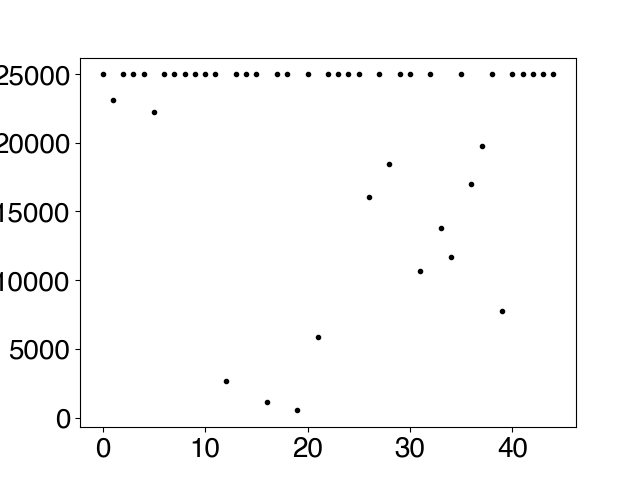

In [8]:
# We will only use "complete" trajectories for autocorrelation calculation
lengths = np.array([ len(tabla[tabla.track==i]) for i in range(info.N[0])])
nt = np.max(lengths)
parts=np.where( lengths>=nt)[0]

plt.figure(0)
plt.plot(lengths, '.', c='k')


In [9]:
plt.close(0)

In [17]:
def get_autocorrelations(tabla):
    
    # We will only use "complete" trajectories for autocorrelation calculation
    lengths = np.array([ len(tabla[tabla.track==i]) for i in range(info.N[0])])

    #nt = np.max(lengths)
    nt = 20000
    parts = np.where(lengths >= nt)[0]
    nparts = len(parts)
    
    # Initialize arrays where time and autocorrelations are stored
    t = np.array( [ i/info.fps[0] for i in range(nt) ] )
    Awpt = np.zeros((nparts,nt)) # rotatational part
    Avpt = np.zeros((nparts,nt)) # translational part
    
    W0 = np.mean( tabla.w[tabla.frame<=nt] )
    AW0 = np.mean( (tabla.w[tabla.frame<=nt] - W0)**2 )
    Av0 = np.mean( tabla.vx[tabla.frame<=nt]**2 +  tabla.vy[tabla.frame<=nt]**2 )  
    
    for j in range(nparts):
        w = tabla[tabla.track==parts[j]].w.values[:nt]
        W = w - np.mean(w)
        vx = tabla[tabla.track==parts[j]].vx.values[:nt]
        # vy = tabla[tabla.track==parts[j]].vy.values[:nt] # for symmetry, y coordinate is redundant (may be used, though)
        for i in range(1, nt-1):
            Awpt[j,i] = time_shift_np_av(W, 1, i)
            Avpt[j,i] = time_shift_np_av(vx, 1, i)
            if i%1000==0:
                printp(str(i) + ' for particle ' + str(j+1) + ' out of ' + str(nparts) + ' particles' )
    
    Awt = np.mean(Awpt, axis=0)/AW0
    Avt = np.mean(Avpt, axis=0)/Av0
    
    spin_unit = 14/info.fps[0]
    W0 = W0 / spin_unit # convert from no. of blades/frame to Hz (14 blades)
    printp("average spin (Hz): " + str(W0) + "     ")
    return t, Awt, Avt

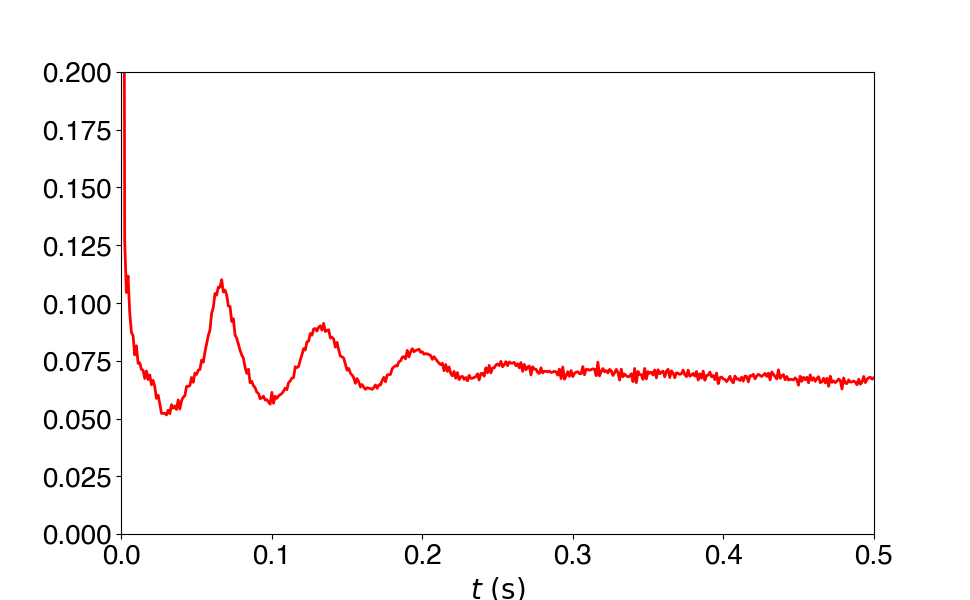

In [25]:
# EXAMPLE OF SPIN AUTOCORRELATION FUNCTION
plt.figure(1,figsize=(6*ct.golden_ratio,6))
plt.xlabel(r'$t~\mathrm{(s)}$')
plt.ylim(0,0.2)
plt.xlim(0,0.5)
Awt[0]=1
Awt[1]=0.5
plt.plot(t,Awt,c ='r', lw=2)
Avt[0]=1
Avt[1]=0.5
#plt.plot(t,Avt, c='k', lw =2) # In case of poltting velocities autocorrelations, uncomment this
#plt.legend([r'$A_w$', r'$A_v$'])

In [24]:
plt.close(1)

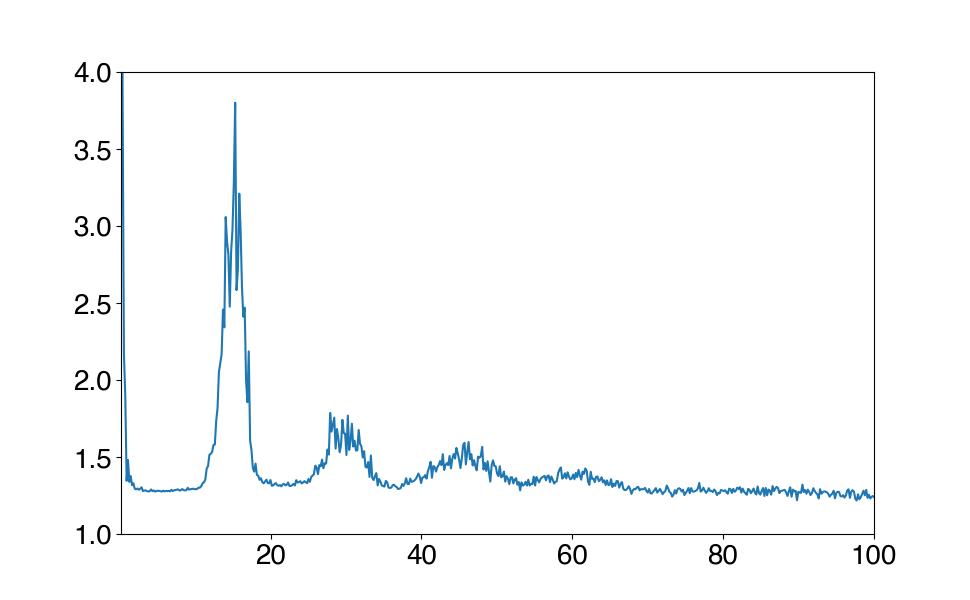

In [34]:
# EXAMPLE OF FFT OF THE SPIN AUTOCORRELATION FUNCTION
plt.figure(2, figsize=(6*ct.golden_ratio, 6))
plt.xlim(0.2,100)
plt.ylim(1, 4)
plt.plot( fftfreq(5000,d=1/info.fps[0]), np.real(fft(Awt[:5000])) )

In [35]:
plt.close(2)

## Lists of critical frequencies $\omega_c$ for series $N=\{3, 10, 25, 45, 55\}$ 

In [11]:
# N = 03
Aw_w_03 = np.array( [ [1.821, 2.70], [8.761, 8.48], [13.165, 13.32], [16.890, 16.57], [20.702, 20.35], [25.566, 25.60], [25.293, 25.37] ] )
Av_w_03 = np.array( [ [1.821, 2.70], [8.761, 8.45], [13.165, 13.32], [16.890, 16.57], [20.702, 20.33], [25.566, 25.56], [25.293, 25.96 ] ] )
# N = 10
Aw_w_10 = np.array( [ [3.373, 6.11], [14.689 , 16.04], [16.071, 16.38], [19.507, 20.69], [20.337, 20.69], [24.946, 25.56], [25.573, 26.09] ] )
Av_w_10 = np.array( [ [3.373, 5.4], [14.689,  16.01], [16.071, 16.56], [19.507, 19.61], [20.337, 20.68], [24.946, 25.92 ], [25.573, 26.99] ] )
# N = 25
Aw_w_25 = np.array( [ [2.43, 6.841], [8.111, 12.25], [15.397, 15.12], [16.618, 16.76], [20.355, 20.16], [20.98, 21.08], [22.564, 22.20] ] )
Av_w_25 = np.array( [ [2.43, 6.842],  [8.111, 12.05], [15.397, 15.65], [16.618, 17.10], [20.355, 20.17], [20.98, 21.23 ], [22.564, 23.57] ] )
# N = 45
Aw_w_45 = np.array( [ [6.190, 10.26], [12.936, 13.51], [14.598, 15.29], [16.91, 17.10] ] )
Av_w_45 = np.array( [ [6.190, 10.28], [12.936, 13.50], [14.598, 15.31], [16.91, 17.29] ] )
# N = 55
Aw_w_55 = np.array( [ [8.079, 10.80], [8.34, 13.50], [9.885, 14.74], [10.10, 14.039], [13.629, 14.57] ] )
Av_w_55 = np.array( [ [8.079, 10.80], [8.34, 13.50], [9.885, 10.81], [10.10, 13.01 ], [13.629, 14.76] ] )


## FIGURE 1 main panel (preliminar) plot

['#f7fbff', '#d0e1f2', '#94c4df', '#4a98c9', '#1764ab', '#08306b']


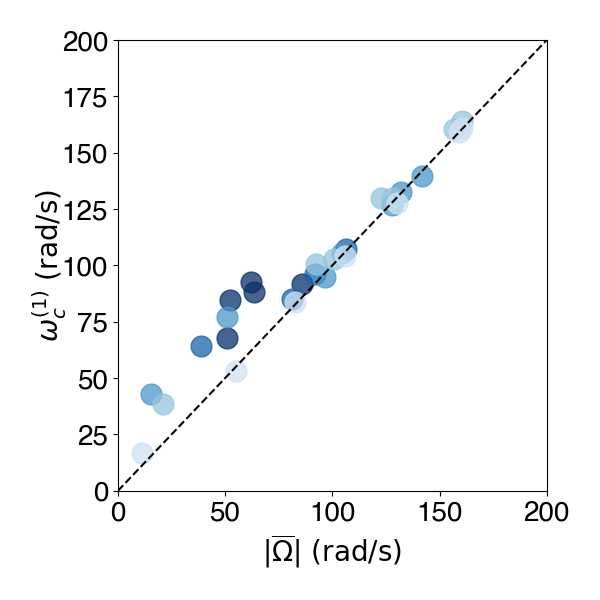

In [12]:
plt.figure(3, figsize =(6, 6))

plt.xlabel( r'$|\overline{\Omega}|~\mathrm{(rad/s)}$' )
plt.ylabel( r'$\omega_c^{(1)}~\mathrm{(rad/s)}$', labelpad=-5)

plt.ylim(0,200)
plt.xlim(0,200)
max0 = 200

color1=mcp.gen_color(cmap="Blues",n=6)
print(color1)
plt.plot(Aw_w_55.T[0]*2*np.pi, Aw_w_55.T[1] * 2*np.pi, '.', c=color1[-1], ms=30, alpha=0.75 )
#plt.plot(Av_w_55.T[0]*2*np.pi, Av_w_55.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.8, fillstyle='none' )

plt.plot(Aw_w_45.T[0]*2*np.pi, Aw_w_45.T[1] * 2*np.pi, '.', c=color1[-2], ms=30, alpha=0.75)
#plt.plot(Av_w_45.T[0]*2*np.pi, Av_w_45.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.6, fillstyle='none' )

plt.plot(Aw_w_25.T[0]*2*np.pi, Aw_w_25.T[1] * 2*np.pi, '.', c=color1[-3], ms=30, alpha=0.75 )
#plt.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.4, fillstyle='none' )

plt.plot(Aw_w_10.T[0]*2*np.pi, Aw_w_10.T[1] * 2*np.pi, '.', c=color1[-4], ms=30, alpha=0.75 )
#plt.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.4, fillstyle='none' )

plt.plot(Aw_w_03.T[0]*2*np.pi, Aw_w_03.T[1] * 2*np.pi, '.', c=color1[-5], ms=30, alpha=0.75 )
#plt.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.4, fillstyle='none' )

plt.plot(np.linspace(0,1.2*max0),np.linspace(0,1.2*max0), '--', c='k' )
plt.tight_layout()

In [49]:
plt.close(3)

## DATA FOR FIGURE 1 and FIGURE 1 SUPPLEMENTARY

In [18]:
N = 3 # pick experiments series with N particles
Tt = 1.5 # approximate value of Tt you want to read
fps = 900 # chosen experiment movie fps rate (possible values: here, needs to be 900 always)
experiments_list = '/home/fvega/Datos/blades/tabla_experimentos.ods' # path to the experiment list table

info, tabla = get_data(N, Tt, fps, experiments_list)

t, Awt03, Avt03 = get_autocorrelations(tabla)
Avt03[0]=1; Avt03[1]=0.5
Awt03[0]=1; Awt03[1]=0.5
#Awt03 = np.copy(Awt)
#Avt03 = np.copy(Avt)
w03= np.copy(fftfreq(5000,d=1/info.fps[0]))
FFT03= np.copy(np.real(fft(Awt03[:5000])))

N = 45 # pick experiments series with N particles
Tt = 2.65 # approximate value of Tt you want to read
fps = 900 # chosen experiment movie fps rate (possible values: here, needs to be 900 always)
experiments_list = '/home/fvega/Datos/blades/tabla_experimentos.ods' # path to the experiment list table

info, tabla = get_data(N, Tt, fps, experiments_list)

t, Awt45, Avt45 = get_autocorrelations(tabla)
Avt45[0]=1; Avt45[1]=0.5
Awt45[0]=1; Awt45[1]=0.5

#Awt45 = np.copy(Awt)
#Avt45 = np.copy(Avt)
w45= np.copy(fftfreq(5000,d=1/info.fps[0]))
FFT45= np.copy(np.real(fft(Awt45[:5000])))

experiment ID is:  04517f89e5599ab3749b603f3b87d69c

Exact Tt is:  1.519827

[run "pdispay(info.T)" to print complete information on the selected experiment]


data table first rows: 



,frame,track,x,y,r,vx,vy,theta,w
0,1,0,12.345032,-88.928891,89.835259,-0.033356,-0.068722,0.595229,-0.453167
1,1,1,109.700452,62.412441,126.235437,0.047959,0.347473,0.967325,-0.520304
2,1,2,31.399581,162.211962,165.258047,0.607102,0.100500,0.331550,-0.467025
3,2,0,12.316939,-88.994913,89.759401,0.025564,0.044603,1.005955,-0.372510
4,2,1,109.663249,62.590744,126.217765,0.160212,0.190439,1.385148,-0.460956


average spin (Hz): -25.5661382513052     experiment ID is:  712d5be2fce52eade6c5564a1f80368f

Exact Tt is:  2.646642

[run "pdispay(info.T)" to print complete information on the selected experiment]


data table first rows: 



,frame,track,x,y,r,vx,vy,theta,w
0,1,0,40.447408,-328.000325,330.503922,0.524411,-0.130805,0.054788,-0.257425
1,1,1,250.116228,46.946393,254.483786,0.081716,0.258624,0.124128,-0.306061
2,1,2,148.381647,46.766712,155.597506,-0.524196,-0.366213,0.028424,-0.259548
3,1,3,-101.934270,61.259356,118.969281,0.188688,0.546385,0.843234,-0.256986
4,1,4,-22.228572,72.072925,75.432304,-0.097197,-0.233317,0.078081,-0.228640


average spin (Hz): -14.764124495275263     

## FIGURE 1 (load data first, by running cell above)

['#fde725', '#5cc863', '#21908d', '#3b518b', '#440154']


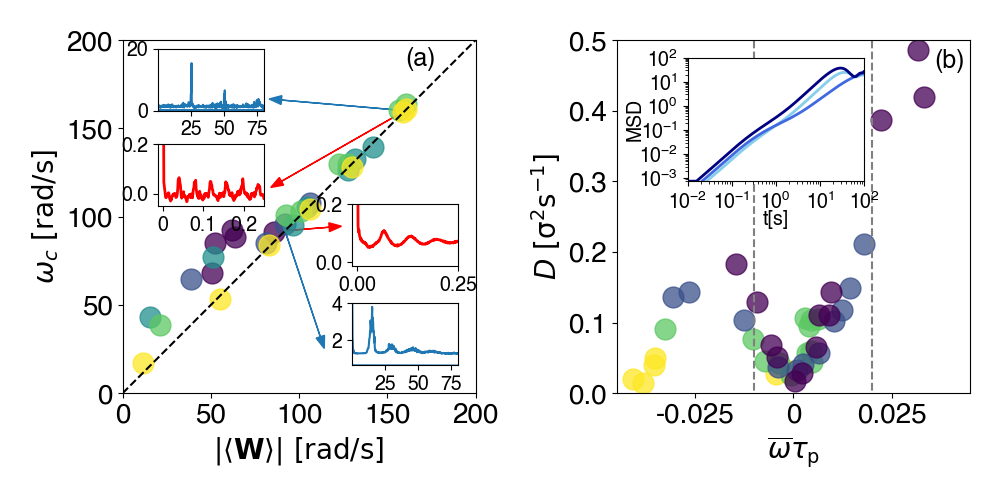

In [21]:
# Create Blank Figure
fig = plt.figure(10, figsize=(10, 5))
mf = 14

# Matplotlib default color palette
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# Alternate Symbol color palette
omega_colors=mcp.gen_color(cmap="viridis_r",n=5)
print(omega_colors)

# Create 2x2 Grid
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create Two main Axes Objects
# FIG 1
# MAIN PANEL A
ax1 = fig.add_subplot(gs[0, 0]) 
# MAIN PANEL B
ax2 = fig.add_subplot(gs[0, 1]) 
# FIG 1A INSETS definitions
ax1_ins_FFT03 = ax1.inset_axes([0.10, 0.80, 0.3, 0.175])
ax1_ins_Awt03 = ax1.inset_axes([0.10, 0.53, 0.3, 0.175])
ax1_ins_FFT45 = ax1.inset_axes([0.65, 0.08, 0.3, 0.175])
ax1_ins_Awt45 = ax1.inset_axes([0.65, 0.36, 0.3, 0.175])
# FIG 1B INSET definition
ax2_ins = ax2.inset_axes([0.2, 0.6, 0.5, 0.35])

###########################################################
# FIG 1A
###########################################################

###########
# MAIN AXIS
###########

# axis properties
ax1.text(160,185, '(a)', fontsize=18)
ax1.set_xlabel( r'$|\langle{\mathbf{W}}\rangle|~\mathrm{[rad/s]}$' )
ax1.set_ylabel( r'$\omega_c~\mathrm{[rad/s]}$')
ax1.set_ylim(0,200)
ax1.set_xlim(0,200)
max0 = 200

ax1.plot(Aw_w_55.T[0]*2*np.pi, Aw_w_55.T[1] * 2*np.pi, '.', c=omega_colors[-1], ms=30, alpha=0.75 )
#plt.plot(Av_w_55.T[0]*2*np.pi, Av_w_55.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.8, fillstyle='none' )

ax1.plot(Aw_w_45.T[0]*2*np.pi, Aw_w_45.T[1] * 2*np.pi, '.', c=omega_colors[-2], ms=30, alpha=0.75)
#plt.plot(Av_w_45.T[0]*2*np.pi, Av_w_45.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.6, fillstyle='none' )

ax1.plot(Aw_w_25.T[0]*2*np.pi, Aw_w_25.T[1] * 2*np.pi, '.', c=omega_colors[-3], ms=30, alpha=0.75 )
#plt.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.4, fillstyle='none' )

ax1.plot(Aw_w_10.T[0]*2*np.pi, Aw_w_10.T[1] * 2*np.pi, '.', c=omega_colors[-4], ms=30, alpha=0.75 )
#plt.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.4, fillstyle='none' )

ax1.plot(Aw_w_03.T[0]*2*np.pi, Aw_w_03.T[1] * 2*np.pi, '.', c=omega_colors[-5], ms=30, alpha=0.75 )
#plt.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c='b', ms=30, alpha=0.4, fillstyle='none' )

ax1.arrow(160, 160, -70, -40, head_width=5, head_length=7, fc='r', ec='r')
ax1.arrow(160, 160, -70, 6, head_width=5, head_length=7,fc=colors[0], ec=colors[0])

ax1.arrow(92, 92, 20, -60, head_width=5, head_length=7, fc=colors[0], ec=colors[0])
ax1.arrow(92, 92, 25, 2, head_width=5, head_length=7,fc='r', ec='r')

ax1.plot(np.linspace(0,1.2*max0),np.linspace(0,1.2*max0), '--', c='k' )


###############
# N = 3 INSETS
###############
# ID: 04517f89e5599ab3749b603f3b87d69c

# FFT
ax1_ins_FFT03.tick_params( labelsize=mf)
ax1_ins_FFT03.set_xlim(0.2,80)
ax1_ins_FFT03.set_ylim(0, 20)
ax1_ins_FFT03.plot( w03, FFT03 )
# AW
ax1_ins_Awt03.tick_params( labelsize=mf) 
ax1_ins_Awt03.set_xlim(-0.0125,0.25)
ax1_ins_Awt03.set_ylim(-0.05,0.2)
w_xticks = [0., 0.1, 0.2]
w_xlabels = ['0', '0.1', '0.2']
ax1_ins_Awt03.set_xticks(w_xticks, w_xlabels)
ax1_ins_Awt03.plot(t[0:600],Awt03[0:600],c ='r', lw=2)

###############
# N = 45 INSETS. 
###############
# ID: 712d5be2fce52eade6c5564a1f80368f

# FFT
ax1_ins_FFT45.tick_params( labelsize=mf) 
#ax1_ins_FFT45.set_xlabel(r'$f~\mathrm{(Hz)}$', fontsize=mf, labelpad=-1)
#ax1_ins_FFT45.set_ylabel(r'$\mathrm{FFT}$', fontsize=mf, labelpad=-1)
ax1_ins_FFT45.set_xlim(0.2,80)
ax1_ins_FFT45.set_ylim(0.65, 4)
ax1_ins_FFT45.plot( w45, FFT45 )

# AW
ax1_ins_Awt45.tick_params( labelsize=mf) 
#ax1_ins_Awt45.set_xlabel(r'$t~\mathrm{(s)}$', fontsize=mf, labelpad=-1)
#ax1_ins_Awt45.set_ylabel(r'$A_W~\mathrm{(t)}$', fontsize=mf, labelpad=-4)
ax1_ins_Awt45.set_xlim(-0.0125,0.25)
ax1_ins_Awt45.set_ylim(-0.0125,0.2)
ax1_ins_Awt45.plot(t[0:600],Awt45[0:600],c ='r', lw=2)


###########################################################
# FIG 1B
###########################################################

tablaD = pd.read_csv('/home/fvega/Datos/blades/diff_coef.dat', sep='\s+')
tabla_msd = pd.read_csv('/home/fvega/Datos/blades/msd.dat', sep ='\s+')


###########
# MAIN AXIS
###########
ax2.text(0.036,0.46, '(b)', fontsize=18)
ax2.set_xlabel(r'$\overline{\omega} \tau_\mathrm{p}$')
ax2.set_ylabel(r'$D~\mathrm{[\sigma^2s^{-1}]}$')
w_xticks = [-0.025, 0, 0.025]
w_xlabels = ['-0.025', '0', '0.025']
ax2.set_xticks(w_xticks, w_xlabels)
ax2.set_xlim(-0.045,0.045)
ax2.set_ylim(0,0.5)
N0 = 3
ax2.plot(tablaD[tablaD.N==N0].omega.values/np.sqrt(tablaD[tablaD.N==N0].Trf.values), tablaD[tablaD.N==N0].D.values,'.', ms=30, c=omega_colors[-5], alpha=0.75)
N0 = 10
ax2.plot(tablaD[tablaD.N==N0].omega.values/np.sqrt(tablaD[tablaD.N==N0].Trf.values), tablaD[tablaD.N==N0].D.values,'.', ms=30, c=omega_colors[-4], alpha=0.75 )
N0 = 25
ax2.plot(tablaD[tablaD.N==N0].omega.values/np.sqrt(tablaD[tablaD.N==N0].Trf.values), tablaD[tablaD.N==N0].D.values,'.', ms=30, c=omega_colors[-2], alpha=0.75)
N0 = 45
ax2.plot(tablaD[tablaD.N==N0].omega.values/np.sqrt(tablaD[tablaD.N==N0].Trf.values), tablaD[tablaD.N==N0].D.values,'.', ms=30, c=omega_colors[-1], alpha=0.75)

ax2.plot(-0.01*np.ones(50),np.linspace(-1,1.2*0.5), '--', c='grey' )
ax2.plot(0.02*np.ones(50),np.linspace(-1,1.2*0.5), '--', c='grey' )

###############
# FIG 1B INSET
###############
# N=55
ax2_ins.tick_params( labelsize=mf)
ax2_ins.set_xlabel('t[s]', fontsize=mf, labelpad=-2)
ax2_ins.set_ylabel('MSD', fontsize=mf, labelpad=-4)
ax2_ins.set_yscale('log')
ax2_ins.set_xscale('log')
ax2_ins.set_ylim(0.00075, 100)
ax2_ins.set_xlim(0.01, 100)
ax2_ins.xaxis.set_major_locator(tck.LogLocator(numticks=999))
ax2_ins.xaxis.set_minor_locator(tck.LogLocator(numticks=999, subs="auto"))
ax2_ins.yaxis.set_major_locator(tck.LogLocator(numticks=999))
ax2_ins.yaxis.set_minor_locator(tck.LogLocator(numticks=999, subs="auto"))
#ax2_ins.grid(which='major', linewidth=0.5)
#ax2_ins.grid(which='minor', linewidth=0.05)
ax2_ins.plot(tabla_msd.t.values, tabla_msd['c+'].values, c='skyblue', lw=2)
ax2_ins.plot(tabla_msd.t.values, tabla_msd['c0'].values, c='royalblue', lw =2)
ax2_ins.plot(tabla_msd.t.values, tabla_msd['c-'].values, c='navy',lw=2)

plt.tight_layout()

In [20]:
plt.close(10)

In [97]:
plt.savefig('fig1_v2.pdf', bbox_inches='tight')

## FIGURE 1 SUPPLEMENTARY MATERIAL

['#fde725', '#5cc863', '#21908d', '#3b518b', '#440154']
['#fde725', '#21908d', '#440154']


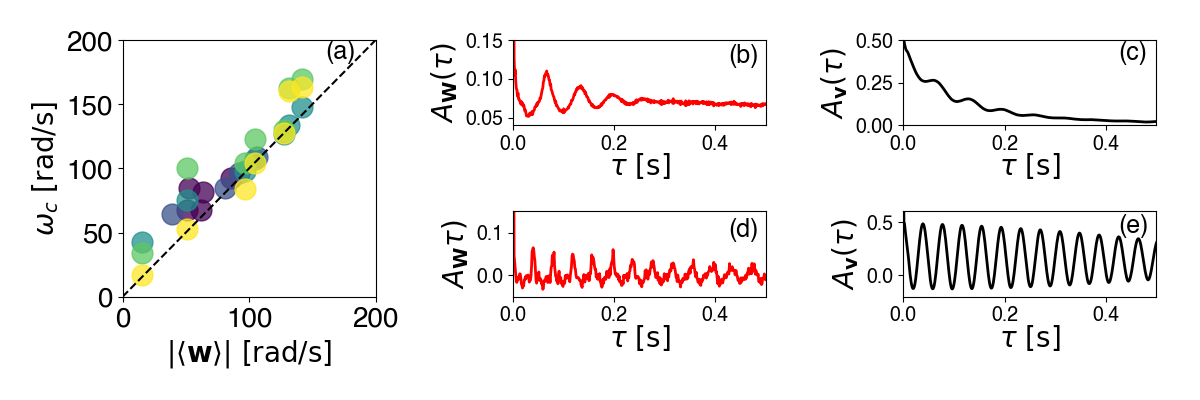

In [22]:
#msd = pd.read_csv('/home/fvega/Datos/blades/prl_comment/msd.dat', sep='\t')

# Create Blank Figure
fig = plt.figure(11, figsize=(12, 4))
mf = 14

# Matplotlib default color palette
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# Alternate Symbol color palette
omega_colors=mcp.gen_color(cmap="viridis_r",n=5)
print(omega_colors)
msd_colors=mcp.gen_color(cmap="viridis_r",n=3)
print(msd_colors)

# Create 2x2 Grid
gs = fig.add_gridspec(nrows=2, ncols=6)

# Create Two main Axes Objects
# FIG 1
# Critical frequencies of Av: MAIN PANEL (left side)
ax1 = fig.add_subplot(gs[0:2, 0:2]) 
# Autocorrelations: 4 PANELS (right side)
ax21 = fig.add_subplot(gs[0,2:4])
ax21.tick_params( labelsize=mf)
ax22 = fig.add_subplot(gs[0,4:]) 
ax22.tick_params( labelsize=mf)
ax23 = fig.add_subplot(gs[1,2:4]) 
ax23.tick_params( labelsize=mf)
ax24 = fig.add_subplot(gs[1,4:]) 
ax24.tick_params( labelsize=mf)


# axis properties
ax1.text(160,185, '(a)', fontsize=18)
ax1.set_xlabel( r'$|\langle\mathbf{w}\rangle|~\mathrm{[rad/s]}$' )
ax1.set_ylabel( r'$\omega_c~\mathrm{[rad/s]}$')
ax1.set_ylim(0,200)
ax1.set_xlim(0,200)
max0 = 200

ax1.plot(Av_w_55.T[0]*2*np.pi, Av_w_55.T[1] * 2*np.pi, '.', c=omega_colors[-1], ms=30, alpha=0.75  )
ax1.plot(Av_w_45.T[0]*2*np.pi, Av_w_45.T[1] * 2*np.pi, '.', c=omega_colors[-2], ms=30, alpha=0.75  )
ax1.plot(Av_w_25.T[0]*2*np.pi, Av_w_25.T[1] * 2*np.pi, '.', c=omega_colors[-3], ms=30, alpha=0.75  )
ax1.plot(Av_w_25.T[0]*2*np.pi, Av_w_10.T[1] * 2*np.pi, '.', c=omega_colors[-4], ms=30, alpha=0.75  )
ax1.plot(Av_w_25.T[0]*2*np.pi, Av_w_03.T[1] * 2*np.pi, '.', c=omega_colors[-5], ms=30, alpha=0.75  )

ax1.plot(np.linspace(0,1.2*max0),np.linspace(0,1.2*max0), '--', c='k' )

ax21.text(0.425,0.12, '(b)', fontsize=18)
ax21.set_xlabel(r'$\tau~\mathrm{ [s]}$', labelpad=-2)
ax21.set_ylabel(r'$A_\mathbf{W}(\tau)$')
ax21.set_ylim(0.04,0.15)
ax21.set_xlim(0,0.5)
ax21.plot(t[0:],Awt45[0:],c ='r', lw=2)

ax22.text(0.425,0.38, '(c)', fontsize=18)
ax22.set_xlabel(r'$\tau~\mathrm{[s]}$', labelpad=-2)
ax22.set_ylabel(r'$A_\mathbf{v}(\tau)$')
ax22.set_ylim(0.0,0.5)
ax22.set_xlim(0,0.5)
ax22.plot(t[0:],Avt45[0:],c ='k', lw=2)

ax23.text(0.425,0.09, '(d)', fontsize=18)
ax23.set_xlabel(r'$\tau~\mathrm{[s]}$', labelpad=-2)
ax23.set_ylabel(r'$A_\mathbf{W}\tau)$')
ax23.set_ylim(-0.05,0.15)
ax23.set_xlim(0,0.5)
ax23.plot(t[0:],Awt03[0:],c ='r', lw=2)

ax24.text(0.425,0.40, '(e)', fontsize=18)
ax24.set_xlabel(r'$\tau~\mathrm{[s]}$', labelpad=-2)
ax24.set_ylabel(r'$A_\mathbf{v}(\tau)$')
ax24.set_ylim(-0.2,0.6)
ax24.set_xlim(0,0.5)
ax24.plot(t[0:],Avt03[0:],c ='k', lw=2)

plt.tight_layout()

In [92]:
plt.close(11)

In [94]:
plt.savefig('/home/fvega/Documentos/Publicaciones/chiral_comment/fig1s.pdf')